# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [3]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

    leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')


<IPython.core.display.Javascript object>


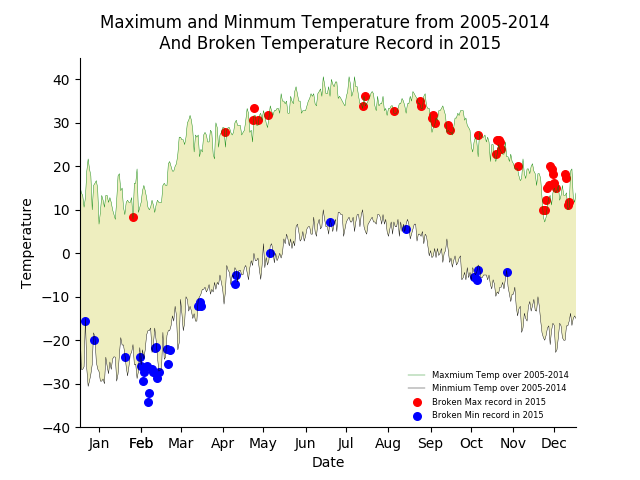

In [4]:
%matplotlib notebook
import re 
import matplotlib as mpl
mpl.get_backend()
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates



def graph():
    
    df=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    df['Date']=pd.to_datetime(df['Date'])
    df['Day']=df['Date'].dt.strftime('%m-%d')
    df_v=df[(df['Date']<'2015-01-01') & (df['Date']>='2005-01-01')].sort_values('Day')
    df_min=df_v.groupby(['Day'])['Data_Value'].min()/10
    df_min=df_min[df_min.index  !='02-29']
    df_max=df_v.groupby(['Day'])['Data_Value'].max()/10
    df_max=df_max[df_max.index  !='02-29']
    df_day= pd.to_datetime('2012-'+ df_v['Day'].unique())
    df_day=df_day[df_day != '2012-02-29']
    #df_day = datetime.strptime('06-03','%m-%b')
    
    df_l=df[(df['Date']<'2016-01-01') & (df['Date']>='2015-01-01')].sort_values('Day')
    df_l['Date']=df_l['Date'].replace('2015','2012')
    df_lmax=df_l.groupby('Day')['Data_Value'].max()/10
    df_lmin=df_l.groupby('Day')['Data_Value'].min()/10
    df_lmax=df_lmax[df_lmax > df_max] 
    df_lmin=df_lmin[df_lmin < df_min]
    df_lmax_date= pd.to_datetime('2012-'+ df_lmax.index)
    df_lmin_date= pd.to_datetime('2012-'+ df_lmin.index)
    
    


    plt.figure()
    plt.plot(df_day,df_max, '-',linewidth=0.3, color ='green',label = 'Maxmium Temp over 2005-2014')
    plt.plot(df_day,df_min, '-',linewidth=0.3, color ='black', label = 'Minmium Temp over 2005-2014',)
    ax = plt.gca()
    ax.axis(['2012-01-01','2012-12-31',-40,45])
    
    locs = ['2012-01-15','2012-02-15','2012-02-15','2012-03-15','2012-04-15','2012-05-15','2012-06-15','2012-07-15','2012-08-15','2012-09-15','2012-10-15','2012-11-15','2012-12-15']
    locs=pd.to_datetime(locs)
    labels = [d.strftime('%b') for d in locs]
    plt.xticks(locs, labels)
    
    plt.gca().fill_between(df_day, df_max, df_min, facecolor ='y', alpha=0.25)
    plt.scatter(df_lmax_date, df_lmax , s=30, c='red', label='Broken Max record in 2015 ')
    plt.scatter(df_lmin_date, df_lmin , s=30, c='blue', label = 'Broken Min record in 2015')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title('Maximum and Minmum Temperature from 2005-2014 \n And Broken Temperature Record in 2015')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
    plt.legend(frameon=False, fontsize= 6)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    
    

# rotate the tick labels for the x axis


 
    
   


    #plt.plot()
    #plt.gca().fill_between(df_date,df_max,df_min,facecolor='red', alpha=0.2)
    
    #return df_day
    
    
graph()   


In [95]:
? plt.gca().fill_between

In [71]:
?plt.plot

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<IPython.core.display.Javascript object>


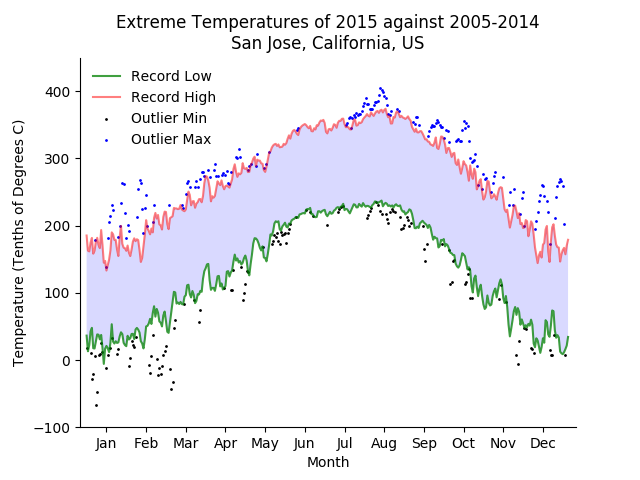

([<matplotlib.axis.XTick at 0x7f2b112a8ba8>,
 <a list of 12 Text xticklabel objects>)

In [5]:
#others' work
#learn: after group, .mean() returns series, .agg(np.mean) returns dataframe
get_ipython().magic('matplotlib notebook')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv('./data/C2A2_data/BinnedCsvs_d400/ed157460d30113a689e487b88dcbef1f5d64cbd8bb7825f5f485013d.csv')
df['Year']=df['Date'].apply(lambda x:x[:4])
df['Month-Day']=df['Date'].apply(lambda x:x[5:])
df=df[df['Month-Day']!='02-29']

df_temp_min=df[(df['Element']=='TMIN') & (df['Year']!='2015')]
df_temp_max=df[(df['Element']=='TMAX') & (df['Year']!='2015')]

temp_min=df_temp_min.groupby('Month-Day')['Data_Value'].agg({'temp_mean':np.mean})

temp_max=df_temp_max.groupby('Month-Day')['Data_Value'].agg({'temp_mean':np.mean})


df_min=df[df['Element']=='TMIN']
df_max=df[df['Element']=='TMAX']

df_min_15=df_min[df['Year']=='2015']
df_max_15=df_max[df['Year']=='2015']

temp_min_15=df_min_15.groupby('Month-Day')['Data_Value'].agg({'temp_mean':np.mean})
temp_max_15=df_max_15.groupby('Month-Day')['Data_Value'].agg({'temp_mean':np.mean})

temp_min.reset_index(inplace=True)
temp_max.reset_index(inplace=True)
temp_min_15.reset_index(inplace=True)
temp_max_15.reset_index(inplace=True)

outlier_min=(temp_min_15[temp_min_15['temp_mean']<temp_min['temp_mean']]).index.tolist()
outlier_max=(temp_max_15[temp_max_15['temp_mean']>temp_max['temp_mean']]).index.tolist()

plt.figure()

plt.plot(temp_min['temp_mean'], 'g', alpha = 0.75, label = 'Record Low')
plt.plot(temp_max['temp_mean'], 'r', alpha = 0.5, label = 'Record High')

plt.scatter(outlier_min, temp_min_15['temp_mean'].iloc[outlier_min], s = 1, c = 'k', label = 'Outlier Min')
plt.scatter(outlier_max, temp_max_15['temp_mean'].iloc[outlier_max], s = 1, c = 'b', label = 'Outlier Max')

plt.xlabel('Month')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Extreme Temperatures of 2015 against 2005-2014\nSan Jose, California, US')

plt.gca().fill_between(range(len(temp_min)), 
                       temp_min['temp_mean'], temp_max['temp_mean'], 
                       facecolor='blue', 
                       alpha=0.15)

plt.gca().axis([-5, 370, -100, 450])
plt.legend(frameon = False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

x=[15,45,75,105,135,165,195,225,255,285,315,345]
Month_Name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(x, Month_Name)

In [6]:
# someone else work
%matplotlib notebook
import matplotlib.pyplot as plt
        import pandas as pd
        import numpy as np
        df = pd.read_csv('data/C2A2_data/BinnedCsvs_d25/9bc594d0d6bf5fec16beb2afb02
        df = df.sort(['ID', 'Date'])
        # Pre-process the data
df['Year'] = df['Date'].apply(lambda x: x[:4]) df['Month-Day'] = df['Date'].apply(lambda x: x[5:]) df = df[df['Month-Day'] != '02-29']
        # df['Month'] = df['Date'].apply(lambda x: x[5:7])
        df_min = df[(df['Element'] == 'TMIN')]
        df_max = df[(df['Element'] == 'TMAX')]
        df_temp_min = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')]
        df_temp_max = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')]
        temp_min = df_temp_min.groupby('Month-Day')['Data_Value'].agg({'temp_min_me
        temp_max = df_temp_max.groupby('Month-Day')['Data_Value'].agg({'temp_max_me
2
temp_min_15_tmp = df_min[df_min['Year'] == '2015']
temp_max_15_tmp = df_max[df_max['Year'] == '2015']
temp_min_15 = temp_min_15_tmp.groupby('Month-Day')['Data_Value'].agg({'temp
temp_max_15 = temp_max_15_tmp.groupby('Month-Day')['Data_Value'].agg({'temp
# Reset Index
temp_min = temp_min.reset_index()
temp_max = temp_max.reset_index()
temp_min_15 = temp_min_15.reset_index()
temp_max_15 = temp_max_15.reset_index()
# Find index
broken_min = (temp_min_15[temp_min_15['temp_min_15_mean'] < temp_min['temp_
broken_max = (temp_max_15[temp_max_15['temp_max_15_mean'] > temp_max['temp_
# print(broken_min)
# print(temp_min_15['temp_min_15_mean'].iloc[broken_min])
plt.figure()
plt.plot(temp_min['temp_min_mean'], 'y', alpha = 0.75, label = 'Record Low'
plt.plot(temp_max['temp_max_mean'], 'r', alpha = 0.5, label = 'Record High'
plt.scatter(broken_min, temp_min_15['temp_min_15_mean'].iloc[broken_min], s
plt.scatter(broken_max, temp_max_15['temp_max_15_mean'].iloc[broken_max], s
plt.xlabel('Month')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Extreme Temperatures of 2015 against 2005-2014\n Beijing, China'
plt.gca().fill_between(range(len(temp_min)),
                       temp_min['temp_min_mean'], temp_max['temp_max_mean']
                       facecolor='grey',
                       alpha=0.2)
plt.gca().axis([-5, 370, -400, 400]) plt.legend(frameon = False)
plt.gca().spines['top'].set_visible(False) plt.gca().spines['right'].set_visible(False)
a = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330] b = [i+15 for i in a]
3
Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'
        plt.xticks(b, Month_name)

IndentationError: unexpected indent (<ipython-input-6-1bcaaa7ebf38>, line 4)